# Dissertation Title: *** Rice Grain Identification using Explainable Artificial Intelligence  ***
#### The prime objective of proposed project is to develop a high accurate model that can classify the severity of knee osteo arthritis from xray images, subsequent objectives are listed below:


1. To study of state-of-the-art literature
2. To perform Descriptive analysis of the image set
3. To implement CNN/DNN (VGG16, ResNet50, DenseNet161), RNN model (LSTM) (generating captions for images)
4. To enhance the model using XAI-LIME technique
5. Compare the efficiency of proposed model with existing models


# Objective 1: To study of state-of-the-art literature
### Data Collection and Descriptive Analysis: This is the first step of the proposed project. The image of knee osteo-arthritis x-ray will be collected from https://data.mendeley.com/datasets/t9ndx37v5h/1.

### Highlights


In [ ]:
# Importing the Data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_path = '/content/drive/MyDrive/Dissertation/Dataset/'

Mounted at /content/drive


In [ ]:
# !wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/t9ndx37v5h-1.zip -P '/content/drive/MyDrive/DissertationDataset/'

In [ ]:
!pip install tensorflow==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%tensorflow_version 2.8.2

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [ ]:
# !unzip /content/drive/MyDrive/DissertationDataset/t9ndx37v5h-1.zip -d '/content/drive/MyDrive/DissertationDataset/'

In [ ]:
# !pip install unrar

In [ ]:
# !unrar x '/content/drive/MyDrive/DissertationDataset/Knee X-ray Images/MedicalExpert-I.rar' '/content/drive/MyDrive/DissertationDataset/Knee X-ray Images/'

In [ ]:
# !unrar x '/content/drive/MyDrive/DissertationDataset/Knee X-ray Images/MedicalExpert-II.rar' '/content/drive/MyDrive/DissertationDataset/Knee X-ray Images/'

# Objective 2: To perform Descriptive analysis of the image set (*Preprocessing*)
### 1. Highlight the boarder of X-Ray Images using open CV tool
### 2. Create dictionary for all right category
### 3. Create a description file for all right images which has right name link with the image
### 4. Created a Training Set from the Image dataset
### 5. Resize all the images to a uniform size  into 224x224 so that any neuaral network model can be applied

In [ ]:
import cv2,os
data_path= root_path + 'Rice_Image_Dataset_short'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Basmati': 0, 'Jasmine': 1, 'Karacadag': 2, 'Ipsala': 3, 'Arborio': 4}
['Basmati', 'Jasmine', 'Karacadag', 'Ipsala', 'Arborio']
[0, 1, 2, 3, 4]


In [ ]:
img_size=224
data=[]
label=[]
# img = image.load_img(img_path, target_size=(224, 224))
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # roi = cv2.selectROI(gray)
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 224 x 224, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(2510, 5)

In [ ]:
data.shape

(2510, 224, 224, 3)

# Objective 3: Design of CNN and RNN Model
### Model Implementation: Convolutional Neural Network and Recurrent Neural Network applied for classification.

### Using CNN, RNN
#### a. Normal CNN model
#### b. VGG16 - Pretrained on image net dataset.
#### c. ResNet50 - ResNet-50 is a convolutional neural network that is 50 layers deep. We can load a pretrained version of the network trained on more than a million images from the ImageNet database
#### d. DenseNet121 (in progress): The densenet-121 model is one of the DenseNet group of models designed to perform image classification. The main difference with the densenet-121 model is the size and accuracy of the model.  
#### e. Combination of CNN (VGG16/ResNet50/DenseNet121) and RNN model (In-progress)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with five outputs for five categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 activation (Activation)     (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

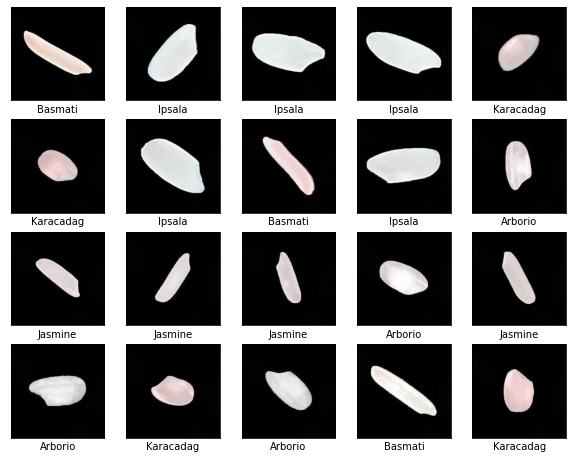

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 23s 161ms/step - loss: 0.4137 - accuracy: 0.8240 - val_loss: 0.0872 - val_accuracy: 0.9757
Epoch 2/100
57/57 [==============================] - 7s 122ms/step - loss: 0.0858 - accuracy: 0.9718 - val_loss: 0.0982 - val_accuracy: 0.9735
Epoch 3/100
57/57 [==============================] - 7s 122ms/step - loss: 0.0821 - accuracy: 0.9734 - val_loss: 0.0617 - val_accuracy: 0.9690
Epoch 4/100
57/57 [==============================] - 7s 122ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0689 - val_accuracy: 0.9757
Epoch 5/100
57/57 [==============================] - 7s 122ms/step - loss: 0.0396 - accuracy: 0.9884 - val_loss: 0.0694 - val_accuracy: 0.9712
Epoch 6/100
57/57 [==============================] - 7s 122ms/step - loss: 0.0546 - accuracy: 0.9851 - val_loss: 0.0594 - val_accuracy: 0.9845
Epoch 7/100
57/57 [==============================] - 7s 123ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0748 - val_accuracy: 0.977

In [ ]:
model.save('/content/drive/MyDrive/Dissertation/Dataset/nomal_model.h5')

In [ ]:
from matplotlib import pyplot as plt

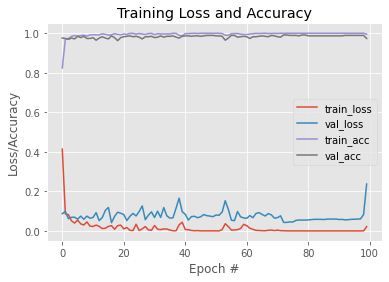

In [ ]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
accuracy_list = []
c_vaL_loss, c_val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", c_vaL_loss*100,'%')
print("test accuracy:", c_val_accuracy*100,"%")

accuracy_list.append(c_val_accuracy)
print(accuracy_list)

test loss: 10.79692542552948 %
test accuracy: 98.0079710483551 %
[0.980079710483551]


prediction: Jasmine
Correct prediction for label 1 is Jasmine


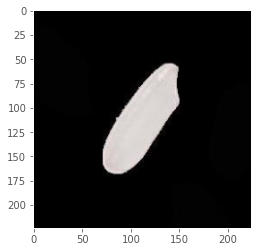

In [ ]:
X = 7

img_size = 224

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,3)

predictions_single = model.predict(img_single)
print('prediction:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

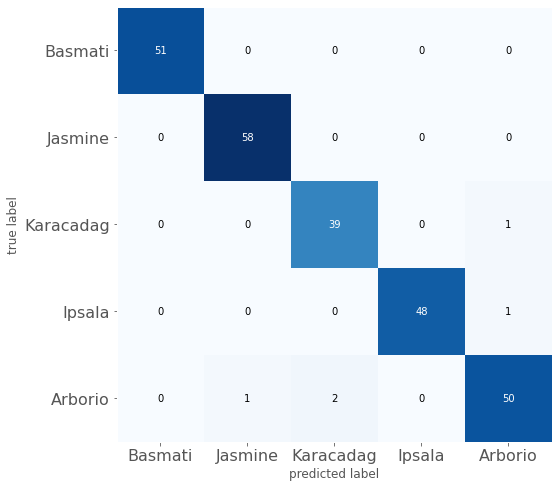

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions_probs = model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), categories, fontsize=16)
plt.yticks(range(5), categories, fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, predictions,average=None)
print(precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, predictions,average=None)
print(recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, predictions,average=None)
print(f1)
# kappa
kappa = cohen_kappa_score(test_labels, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels, predictions_probs, multi_class="ovo")
print('ROC AUC: %f' % auc)

Accuracy: 0.980080
[1.         0.98305085 0.95121951 1.         0.96153846]
[1.         1.         0.975      0.97959184 0.94339623]
[1.         0.99145299 0.96296296 0.98969072 0.95238095]
Cohens kappa: 0.975015
ROC AUC: 0.999635


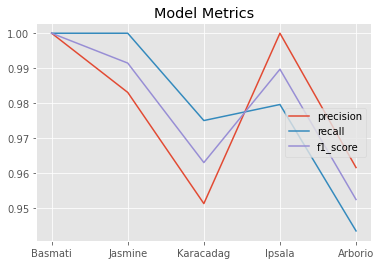

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(categories, precision, label="precision")
plt.plot(recall, label="recall")
plt.plot(f1, label="f1_score")
plt.title("Model Metrics")
plt.legend(loc="center right")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D,BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, Activation
# from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [ ]:
vgg16_model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
vgg16_model.trainable=False
vgg16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model=Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 19s 265ms/step - loss: 1.0415 - accuracy: 0.7449 - val_loss: 0.6212 - val_accuracy: 0.9358
Epoch 2/100
57/57 [==============================] - 12s 203ms/step - loss: 0.4705 - accuracy: 0.9369 - val_loss: 0.3511 - val_accuracy: 0.9712
Epoch 3/100
57/57 [==============================] - 11s 201ms/step - loss: 0.2890 - accuracy: 0.9762 - val_loss: 0.2585 - val_accuracy: 0.9646
Epoch 4/100
57/57 [==============================] - 11s 198ms/step - loss: 0.2146 - accuracy: 0.9795 - val_loss: 0.2123 - val_accuracy: 0.9624
Epoch 5/100
57/57 [==============================] - 11s 197ms/step - loss: 0.1690 - accuracy: 0.9862 - val_loss: 0.1722 - val_accuracy: 0.9823
Epoch 6/100
57/57 [==============================] - 11s 198ms/step - loss: 0.1399 - accuracy: 0.9900 - val_loss: 0.1428 - val_accuracy: 0.9845
Epoch 7/100
57/57 [==============================] - 11s 200ms/step - loss: 0.1198 - accuracy: 0.9895 - val_loss: 0.1261 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Dissertation/Dataset/vgg16_model.h5')

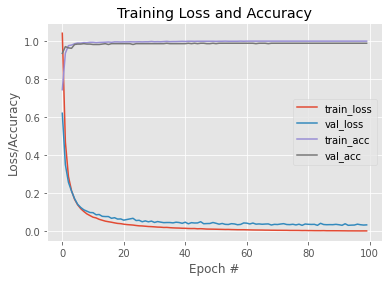

In [ ]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/MyDrive/Dissertation/Dataset/VGG16_Model")

In [ ]:
v_vaL_loss, v_val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", v_vaL_loss,'%')
print("test accuracy:", v_val_accuracy,"%")

accuracy_list.append(v_val_accuracy)
print(accuracy_list)

test loss: 0.01342717558145523 %
test accuracy: 0.9960159659385681 %
[0.980079710483551, 0.9960159659385681]


prediction: Jasmine
Correct prediction for label 1 is Jasmine


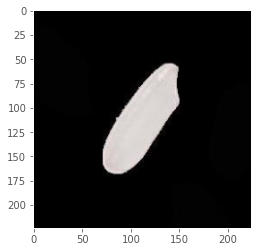

In [ ]:
X = 7

img_size = 224

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,3)

predictions_single = model.predict(img_single)
print('prediction:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

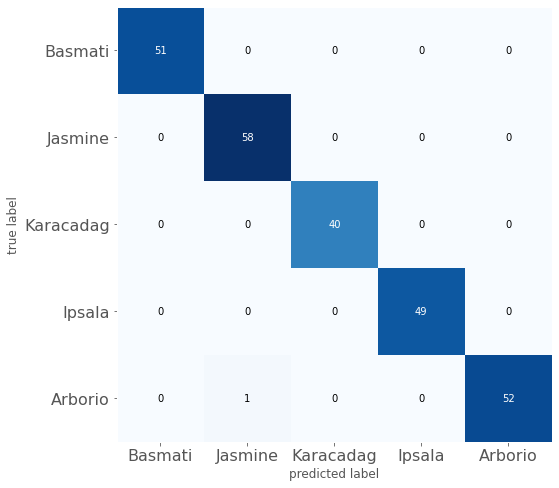

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions_probs = model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), categories, fontsize=16)
plt.yticks(range(5), categories, fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, predictions,average=None)
print(precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, predictions,average=None)
print(recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, predictions,average=None)
print(f1)
# kappa
kappa = cohen_kappa_score(test_labels, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels, predictions_probs, multi_class="ovo")
print('ROC AUC: %f' % auc)

Accuracy: 0.996016
[1.         0.98305085 1.         1.         1.        ]
[1.         1.         1.         1.         0.98113208]
[1.         0.99145299 1.         1.         0.99047619]
Cohens kappa: 0.995002
ROC AUC: 1.000000


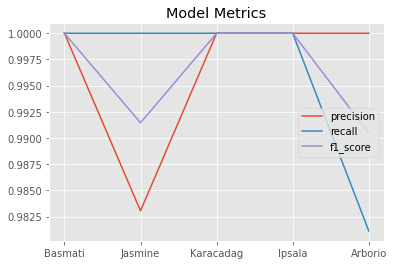

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(categories, precision, label="precision")
plt.plot(recall, label="recall")
plt.plot(f1, label="f1_score")
plt.title("Model Metrics")
plt.legend(loc="center right")

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(include_top=False, weights='imagenet',pooling=None,input_shape=(224,224,3))
resnet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
model=Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 5)                 501765    
                                                                 
Total params: 24,089,477
Trainable params: 24,036,357
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 32s 430ms/step - loss: 0.2640 - accuracy: 0.9275 - val_loss: 2.9121 - val_accuracy: 0.1881
Epoch 2/100
57/57 [==============================] - 20s 359ms/step - loss: 0.0743 - accuracy: 0.9845 - val_loss: 2.5004 - val_accuracy: 0.1881
Epoch 3/100
57/57 [==============================] - 20s 349ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 1.9636 - val_accuracy: 0.2212
Epoch 4/100
57/57 [==============================] - 20s 351ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 1.9476 - val_accuracy: 0.2456
Epoch 5/100
57/57 [==============================] - 20s 358ms/step - loss: 0.0090 - accuracy: 0.9961 - val_loss: 1.9398 - val_accuracy: 0.2279
Epoch 6/100
57/57 [==============================] - 20s 360ms/step - loss: 0.0028 - accuracy: 0.9983 - val_loss: 1.8054 - val_accuracy: 0.2212
Epoch 7/100
57/57 [==============================] - 20s 356ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 1.7662 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Dissertation/Dataset/resnet50_model.h5')

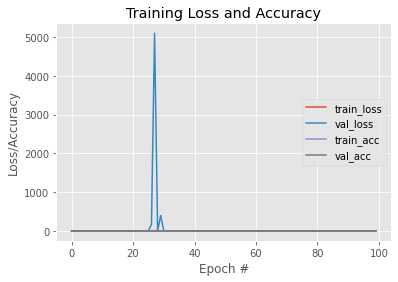

In [ ]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/MyDrive/Dissertation/Dataset/resnet_Model")

In [ ]:
r_vaL_loss, r_val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", r_vaL_loss,'%')
print("test accuracy:", r_val_accuracy,"%")

accuracy_list.append(r_val_accuracy)
print(accuracy_list)

test loss: 0.004956002812832594 %
test accuracy: 0.9960159659385681 %
[0.980079710483551, 0.9960159659385681, 0.9960159659385681]


prediction: Jasmine
Correct prediction for label 1 is Jasmine


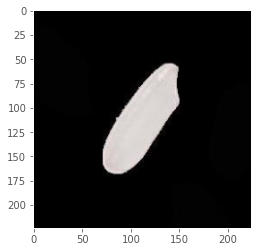

In [ ]:
X = 7

img_size = 224

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,3)

predictions_single = model.predict(img_single)
print('prediction:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

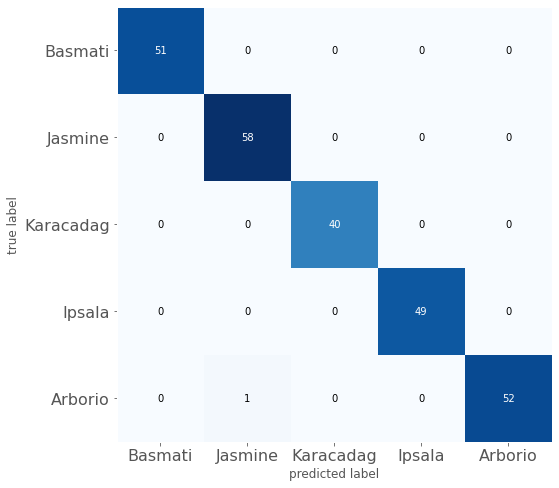

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions_probs = model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), categories, fontsize=16)
plt.yticks(range(5), categories, fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, predictions,average=None)
print(precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, predictions,average=None)
print(recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, predictions,average=None)
print(f1)
# kappa
kappa = cohen_kappa_score(test_labels, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels, predictions_probs, multi_class="ovo")
print('ROC AUC: %f' % auc)

Accuracy: 0.996016
[1.         0.98305085 1.         1.         1.        ]
[1.         1.         1.         1.         0.98113208]
[1.         0.99145299 1.         1.         0.99047619]
Cohens kappa: 0.995002
ROC AUC: 1.000000


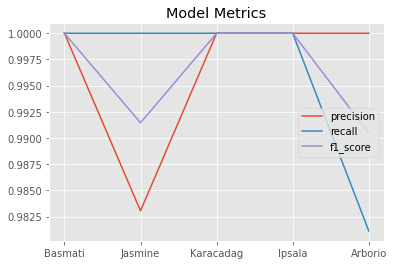

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(categories, precision, label="precision")
plt.plot(recall, label="recall")
plt.plot(f1, label="f1_score")
plt.title("Model Metrics")
plt.legend(loc="center right")

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
densenet_model = DenseNet121(include_top=False, weights='imagenet',pooling=None,input_shape=(224,224,3))
densenet_model.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
model=Sequential()
model.add(densenet_model)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 5)                 250885    
                                                                 
Total params: 7,288,389
Trainable params: 7,204,741
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 56s 493ms/step - loss: 0.1937 - accuracy: 0.9308 - val_loss: 1.6122 - val_accuracy: 0.6062
Epoch 2/100
57/57 [==============================] - 21s 376ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 1.3083 - val_accuracy: 0.6549
Epoch 3/100
57/57 [==============================] - 23s 402ms/step - loss: 0.0460 - accuracy: 0.9840 - val_loss: 2.2363 - val_accuracy: 0.5752
Epoch 4/100
57/57 [==============================] - 22s 391ms/step - loss: 0.0158 - accuracy: 0.9934 - val_loss: 2.0373 - val_accuracy: 0.6261
Epoch 5/100
57/57 [==============================] - 22s 386ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.8278 - val_accuracy: 0.7412
Epoch 6/100
57/57 [==============================] - 22s 384ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 2.0181 - val_accuracy: 0.7633
Epoch 7/100
57/57 [==============================] - 22s 385ms/step - loss: 0.0041 - accuracy: 0.9978 - val_loss: 1.7877 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Dissertation/Dataset/densenet_model.h5')

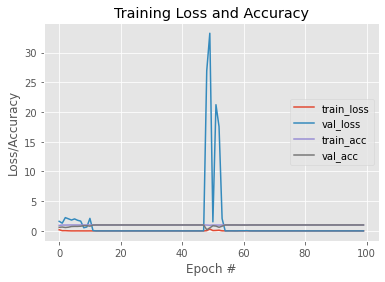

In [ ]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/MyDrive/Dissertation/Dataset/densenet_Model")

In [ ]:
d_vaL_loss, d_val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", d_vaL_loss,'%')
print("test accuracy:", d_val_accuracy,"%")
# remove this below line if all model runs at once
accuracy_list = [0.980079710483551, 0.9960159659385681, 0.9960159659385681]
accuracy_list.append(d_val_accuracy)
print(accuracy_list)

test loss: 0.007527691312134266 %
test accuracy: 0.9960159659385681 %
[0.980079710483551, 0.9960159659385681, 0.9960159659385681, 0.9960159659385681]


prediction: Karacadag
Correct prediction for label 2 is Karacadag


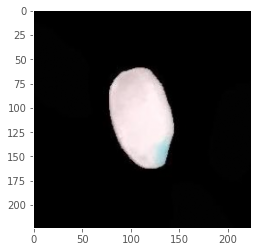

In [ ]:
X = 21

img_size = 224

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,3)

predictions_single = model.predict(img_single)
print('prediction:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

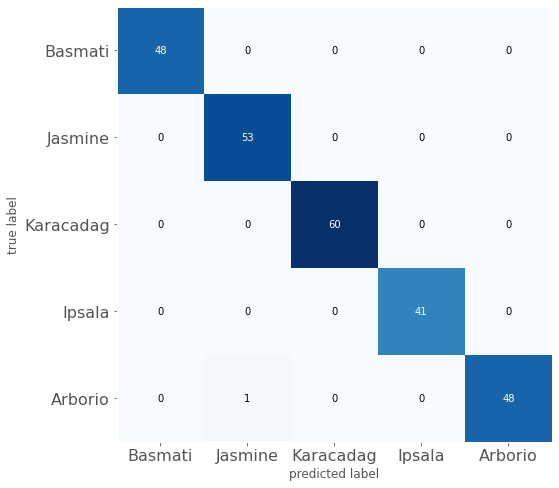

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions_probs = model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), categories, fontsize=16)
plt.yticks(range(5), categories, fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, predictions,average=None)
print(precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, predictions,average=None)
print(recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, predictions,average=None)
print(f1)
# kappa
kappa = cohen_kappa_score(test_labels, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels, predictions_probs, multi_class="ovo")
print('ROC AUC: %f' % auc)

Accuracy: 0.996016
[1.         0.98148148 1.         1.         1.        ]
[1.         1.         1.         1.         0.97959184]
[1.         0.99065421 1.         1.         0.98969072]
Cohens kappa: 0.995000
ROC AUC: 0.999961


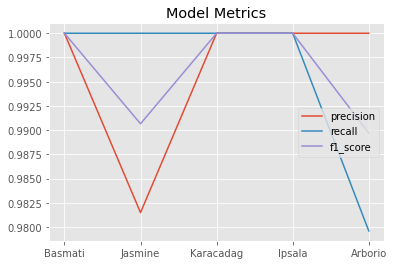

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(categories, precision, label="precision")
plt.plot(recall, label="recall")
plt.plot(f1, label="f1_score")
plt.title("Model Metrics")
plt.legend(loc="center right")

prediction: Ipsala


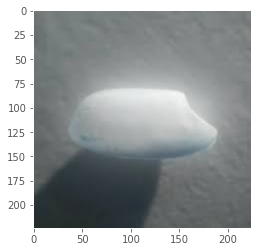

In [ ]:
img_size = 224

img_single = '/content/drive/MyDrive/DissertationDataset1/rice_grain.jpg'
img_single = cv2.imread(img_single)
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],224,224,3)

predictions_single = model.predict(img_single)
print('prediction:',categories[np.argmax(predictions_single)])
# print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

[0.980079710483551, 0.9960159659385681, 0.9960159659385681, 0.9960159659385681]


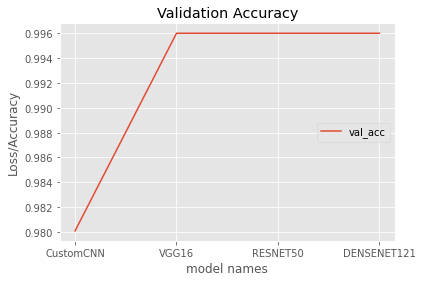

In [ ]:
# plot the comparative validation loss and accuracy
print(accuracy_list)
plt.style.use("ggplot")
plt.figure()
model_list = ['CustomCNN', 'VGG16', 'RESNET50', 'DENSENET121']
plt.plot(model_list,accuracy_list, label="val_acc")
plt.title("Validation Accuracy")
plt.xlabel("model names")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/MyDrive/Dissertation/Dataset/comparativeAccuracy")

# Objective 4: To enhance the model using XAI-LIME technique
## Enhancing model using XAI and Transfer Learning:
* The goal of this study is to investigate and use XAI approaches to rice breed categorization in order to gain a better understanding of the opaque "black-box" nature of machine learning models.
* In XAI approach will be done using LIME (Local Interpretable Model-agnostic Explanations).

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.6 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=feb7393c1d9bed5e1c19f40c3f3e83ccb08f482fd5dee95bbcaad0d2e0d0265f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Dissertation/Dataset/nomal_model.h5')

Actual image name is :  basmati (3).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

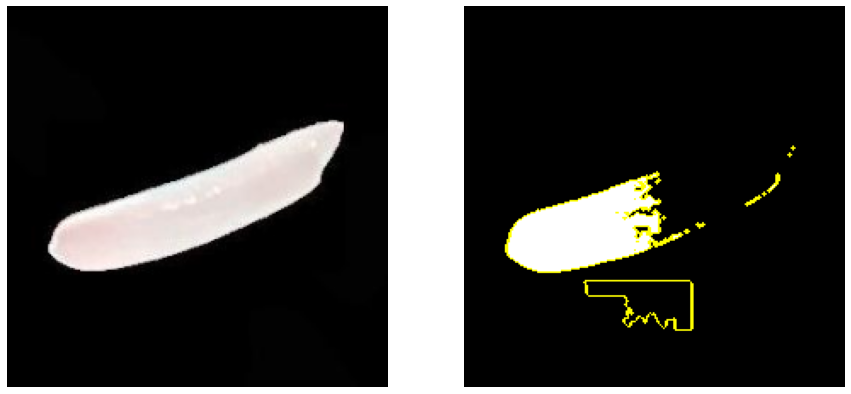

Actual image name is :  Ipsala (38).jpg
prediction: Ipsala
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

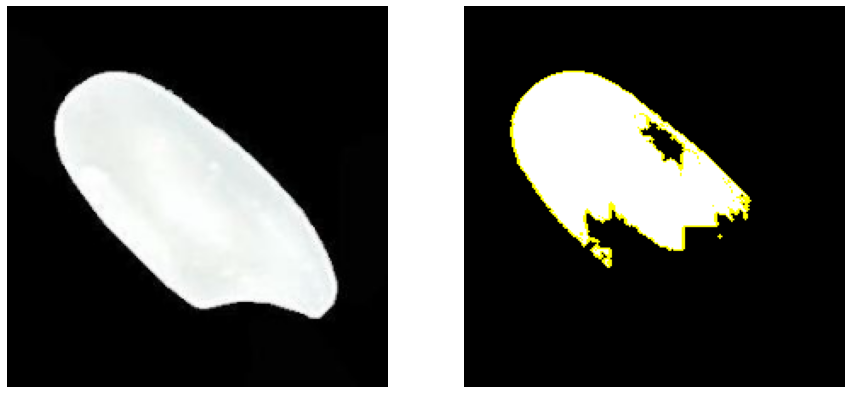

Actual image name is :  Jasmine (14).jpg
prediction: Jasmine
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

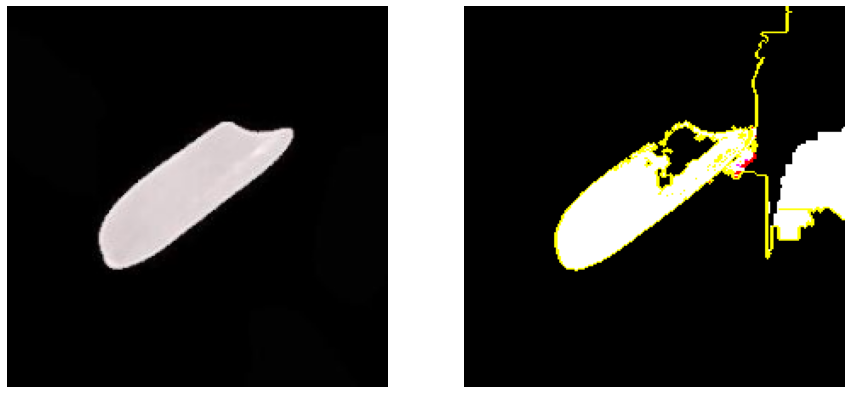

Actual image name is :  Karacadag (29).jpg
prediction: Karacadag
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

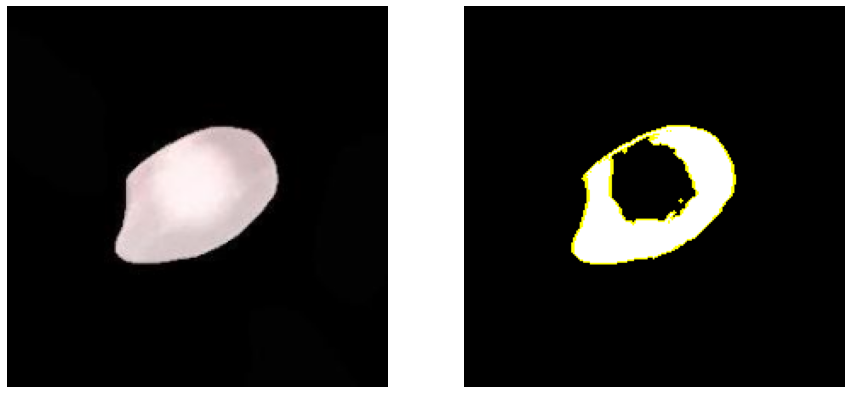

Actual image name is :  Arborio (4).jpg
prediction: Arborio
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

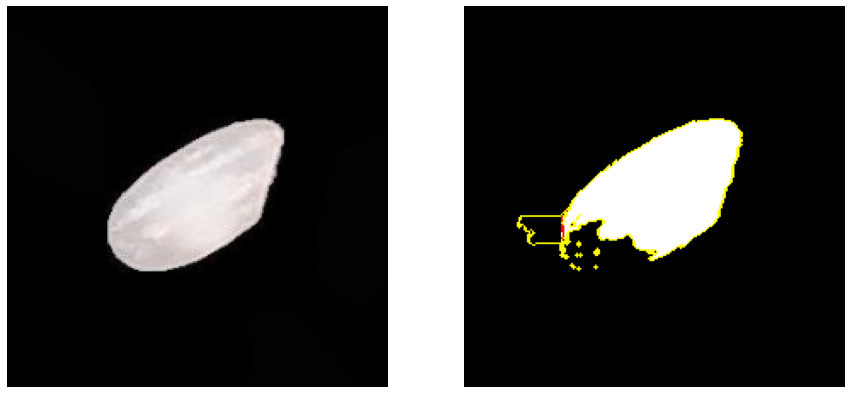

In [ ]:
from skimage.segmentation import mark_boundaries

folder_path='/content/drive/MyDrive/Dissertation/Dataset/all_rice_sample/'
img_names=os.listdir(folder_path)

img_size = 224

for img_name in img_names:
  print("Actual image name is : ",img_name)
  img_single=os.path.join(folder_path,img_name)
  img_single = cv2.imread(img_single)
  img_single = cv2.resize(img_single, (img_size, img_size))
  img_single = (np.expand_dims(img_single, 0))
  img_single = img_single.reshape(img_single.shape[0],224,224,3)

  predictions_single = model.predict(img_single)
  print('prediction:',categories[np.argmax(predictions_single)])
  pct = np.max(predictions_single)
  print("Accuracy : ",pct)
  # plt.imshow(np.squeeze(img_single))
  # plt.grid(False)
  # plt.show()


  explanation= explainer.explain_instance(img_single[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

  temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  # temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(np.squeeze(img_single))
  ax2.imshow(mark_boundaries(temp_1, mask_1))
  # ax2.imshow(mark_boundaries(temp_2, mask_2))
  ax1.axis('off')
  ax2.axis('off')

  plt.show()

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Dissertation/Dataset/vgg16_model.h5')

Actual image name is :  basmati (3).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

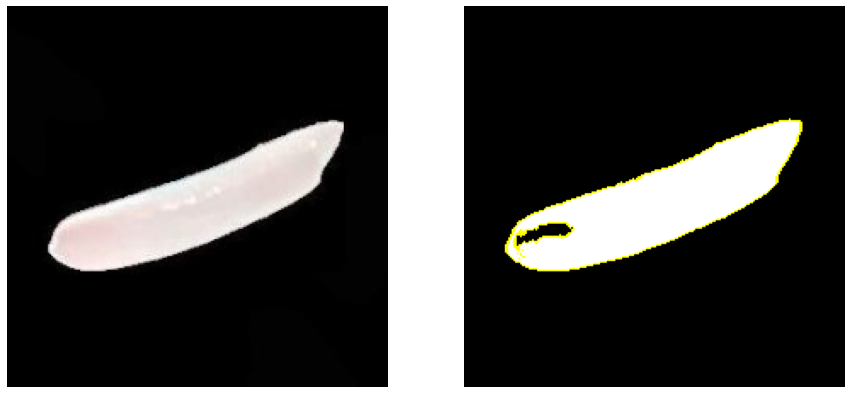

Actual image name is :  Ipsala (38).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

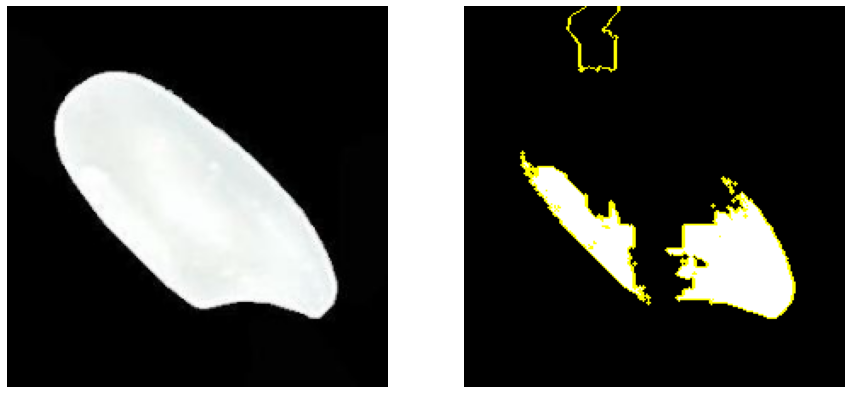

Actual image name is :  Jasmine (14).jpg
prediction: Jasmine
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

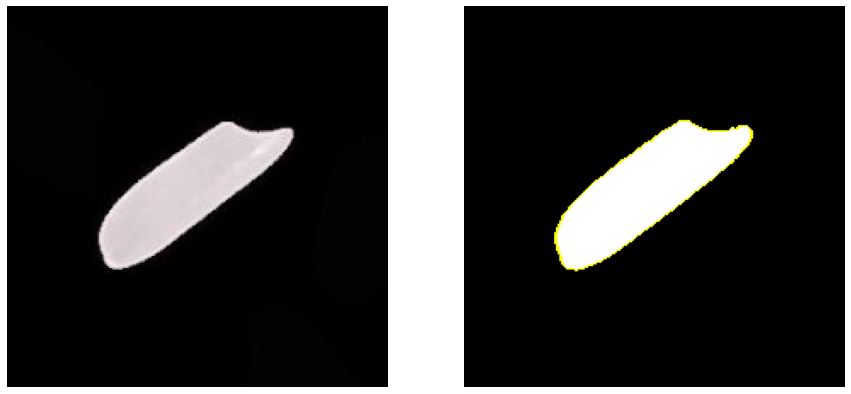

Actual image name is :  Karacadag (29).jpg
prediction: Karacadag
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

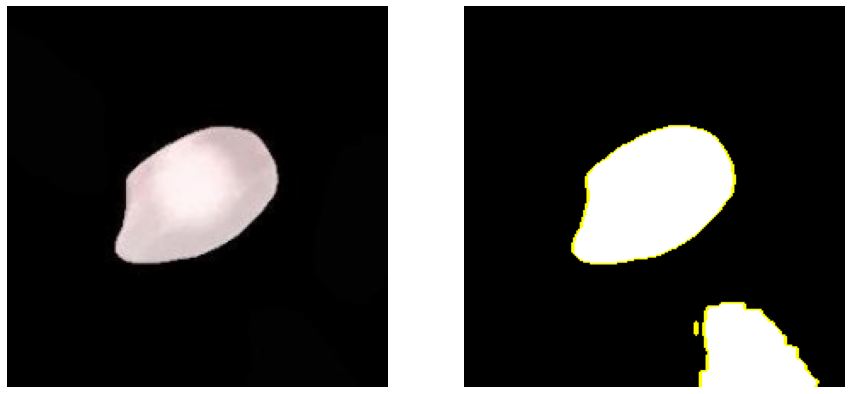

Actual image name is :  Arborio (4).jpg
prediction: Arborio
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

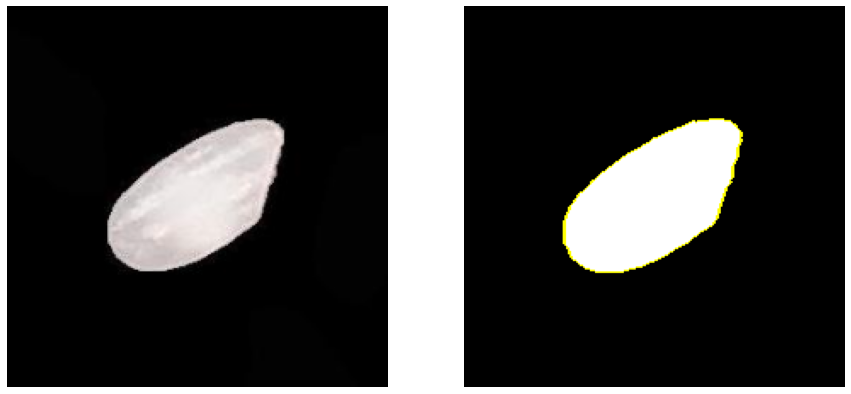

In [ ]:
from skimage.segmentation import mark_boundaries

folder_path='/content/drive/MyDrive/Dissertation/Dataset/all_rice_sample/'
img_names=os.listdir(folder_path)

img_size = 224

for img_name in img_names:
  print("Actual image name is : ",img_name)
  img_single=os.path.join(folder_path,img_name)
  img_single = cv2.imread(img_single)
  img_single = cv2.resize(img_single, (img_size, img_size))
  img_single = (np.expand_dims(img_single, 0))
  img_single = img_single.reshape(img_single.shape[0],224,224,3)

  predictions_single = model.predict(img_single)
  print('prediction:',categories[np.argmax(predictions_single)])
  pct = np.max(predictions_single)
  print("Accuracy : ",pct)
  # plt.imshow(np.squeeze(img_single))
  # plt.grid(False)
  # plt.show()


  explanation= explainer.explain_instance(img_single[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

  temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  # temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(np.squeeze(img_single))
  ax2.imshow(mark_boundaries(temp_1, mask_1))
  # ax2.imshow(mark_boundaries(temp_2, mask_2))
  ax1.axis('off')
  ax2.axis('off')

  plt.show()

Actual image name is :  basmati (3).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

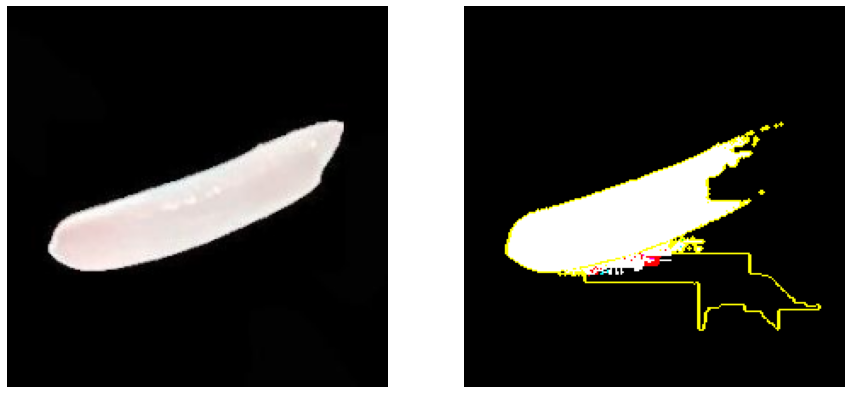

Actual image name is :  Ipsala (38).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

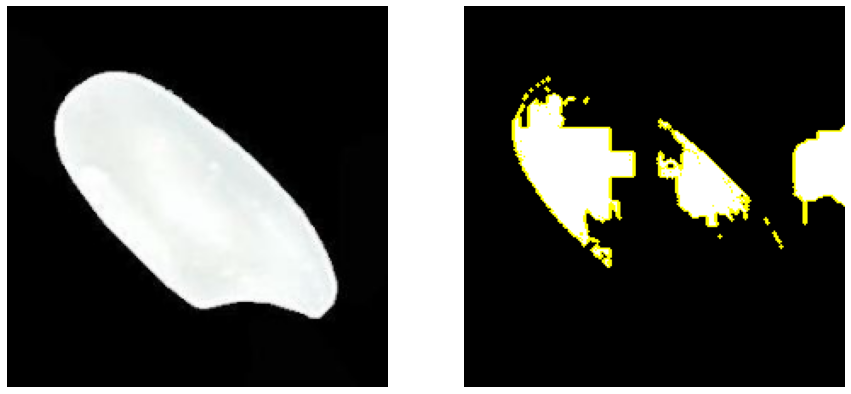

Actual image name is :  Jasmine (14).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

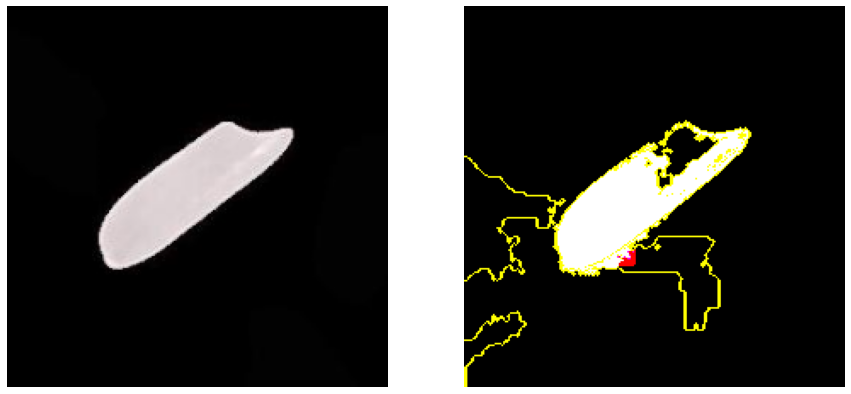

Actual image name is :  Karacadag (29).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

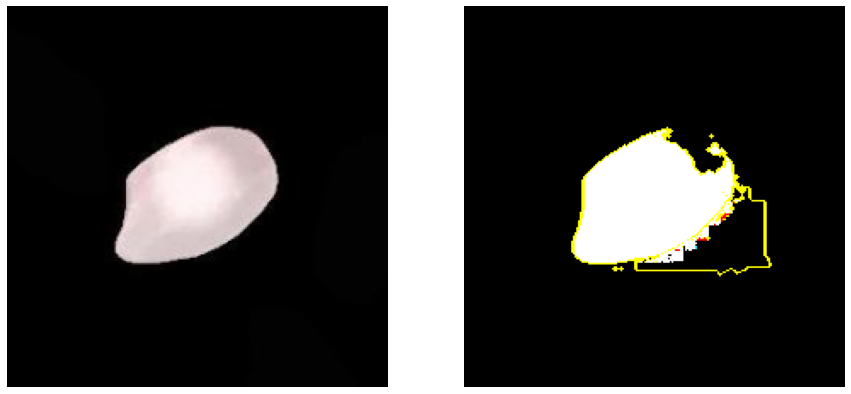

Actual image name is :  Arborio (4).jpg
prediction: Basmati
Accuracy :  1.0


  0%|          | 0/1000 [00:00<?, ?it/s]

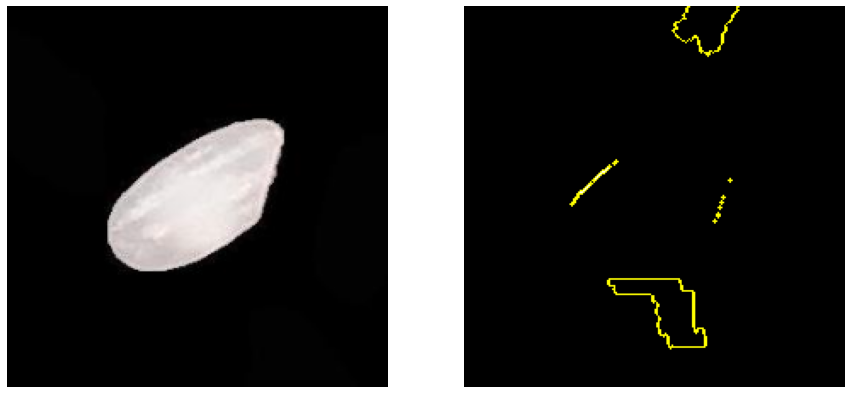

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Dissertation/Dataset/densenet_model.h5')

from skimage.segmentation import mark_boundaries

folder_path='/content/drive/MyDrive/Dissertation/Dataset/all_rice_sample/'
img_names=os.listdir(folder_path)

img_size = 224

for img_name in img_names:
  print("Actual image name is : ",img_name)
  img_single=os.path.join(folder_path,img_name)
  img_single = cv2.imread(img_single)
  img_single = cv2.resize(img_single, (img_size, img_size))
  img_single = (np.expand_dims(img_single, 0))
  img_single = img_single.reshape(img_single.shape[0],224,224,3)

  predictions_single = model.predict(img_single)
  print('prediction:',categories[np.argmax(predictions_single)])
  pct = np.max(predictions_single)
  print("Accuracy : ",pct)
  # plt.imshow(np.squeeze(img_single))
  # plt.grid(False)
  # plt.show()


  explanation= explainer.explain_instance(img_single[0].astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

  temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
  # temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
  ax1.imshow(np.squeeze(img_single))
  ax2.imshow(mark_boundaries(temp_1, mask_1))
  # ax2.imshow(mark_boundaries(temp_2, mask_2))
  ax1.axis('off')
  ax2.axis('off')

  plt.show()